# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings

# Problem Statement

Pertumbuhan supermarket di kota-kota yang padat penduduknya semakin meningkat dan persaingan pasar juga tinggi. Dalam konteks ini, [dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales) yang diberikan berisi catatan penjualan historis dari perusahaan supermarket yang tercatat di 3 cabang yang berbeda selama 3 bulan. Data ini dapat digunakan untuk menganalisis tren penjualan, perilaku pelanggan, dan tujuan bisnis yang berhubungan dengan perusahaan supermarket tersebut.

## Objective
- Memahami profil pelanggan berdasarkan jenis pelanggan, jenis kelamin, dan kategori produk yang dibeli.
- Menganalisis tren penjualan di masing-masing cabang supermarket.
- Menentukan faktor-faktor yang berpengaruh terhadap rating pengalaman berbelanja pelanggan.

## Goals
- Menganalisis kategori produk yang paling diminati oleh pelanggan.
- Mengidentifikasi cabang supermarket dengan penjualan tertinggi dan terendah.
- Menentukan jenis pelanggan yang memberikan rating pengalaman berbelanja tertinggi.

## Business Metrics
- Segmentasi Pelanggan

    Mengukur jumlah pelanggan berdasarkan jenis pelanggan dan jenis kelamin dari setiap produk. Hal ini akan membantu dalam memahami profil pelanggan secara lebih terperinci dan mengidentifikasi segmentasi pelanggan yang berbeda.


- Total penjualan per cabang supermarket.

    Mengukur total nilai penjualan yang dihasilkan oleh masing-masing cabang supermarket beserta total customer.


- Rating rata-rata pengalaman berbelanja.

    Mengukur rata-rata rating yang diberikan oleh pelanggan terhadap pengalaman berbelanja di supermarket termasuk persentase kontribusi penjualan yang berasal dari setiap kategori produk.

# Load Dataset

Dataset: [Super Sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df_dummies = df.copy()

# Data Exploration

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Numeric features & Categoric features

In [9]:
# variabel numeric
numeric_var = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

# variabel categoric
categoric_var = ['Invoice ID', 'Branch', 'City','Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']

In [10]:
df[categoric_var].describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [11]:
df[numeric_var].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Histogram

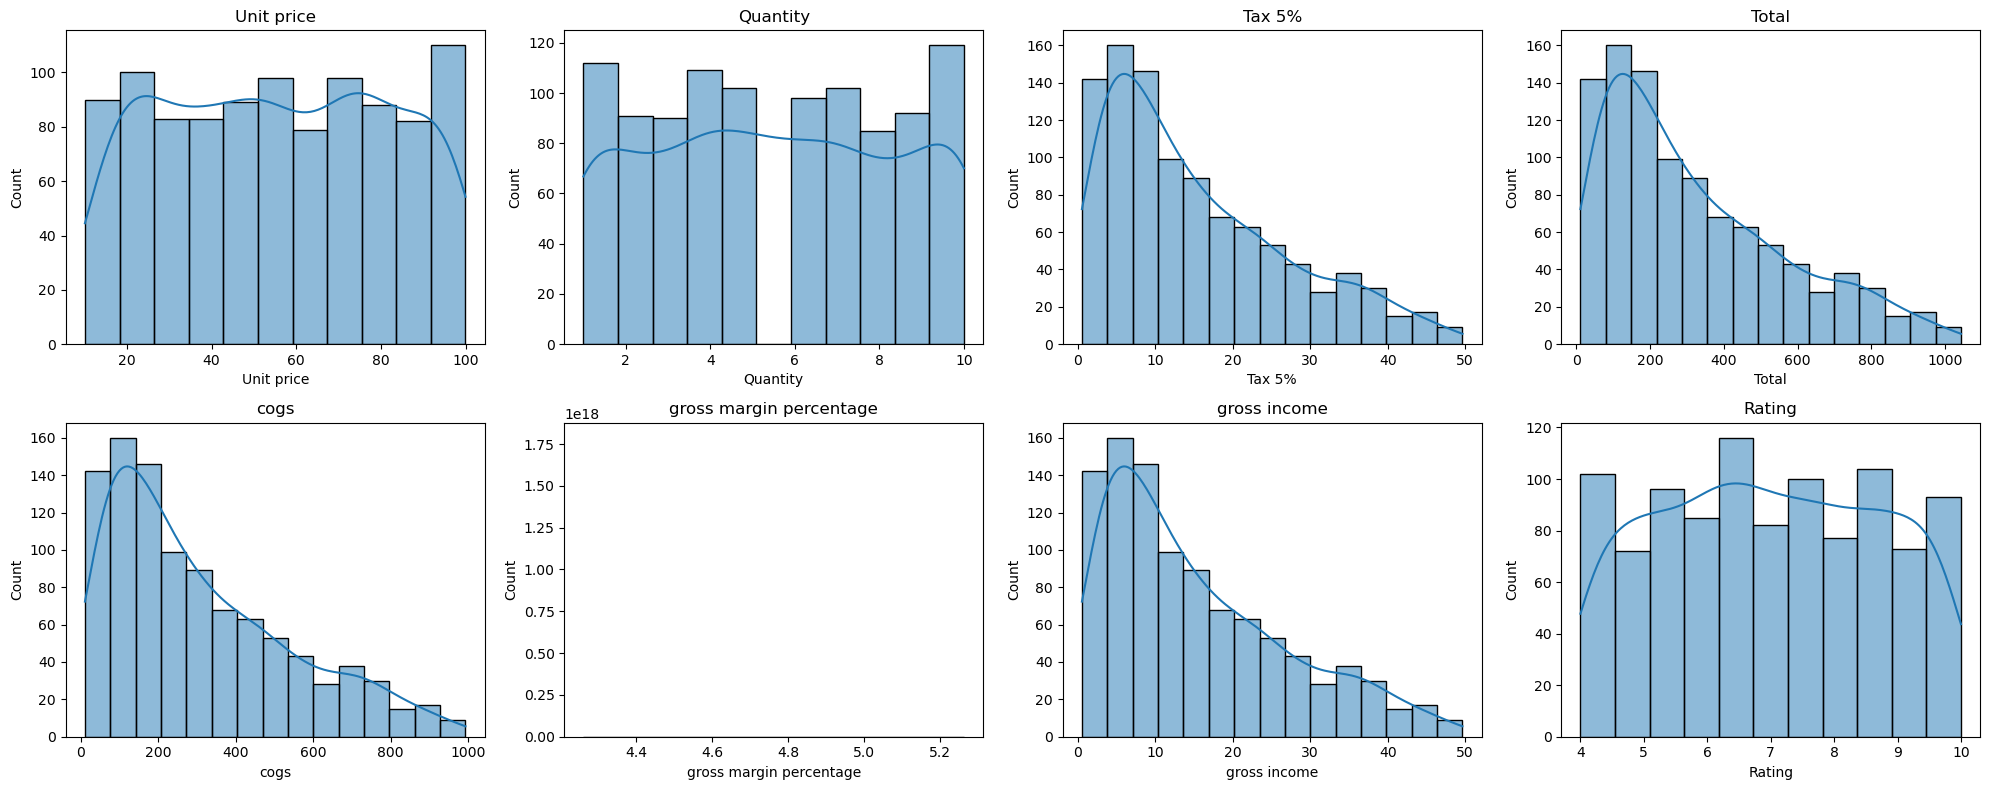

In [12]:
plt.figure(figsize=(20, 8))

for i, var in enumerate(numeric_var):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(var)

plt.tight_layout()
plt.show()

## Boxplot

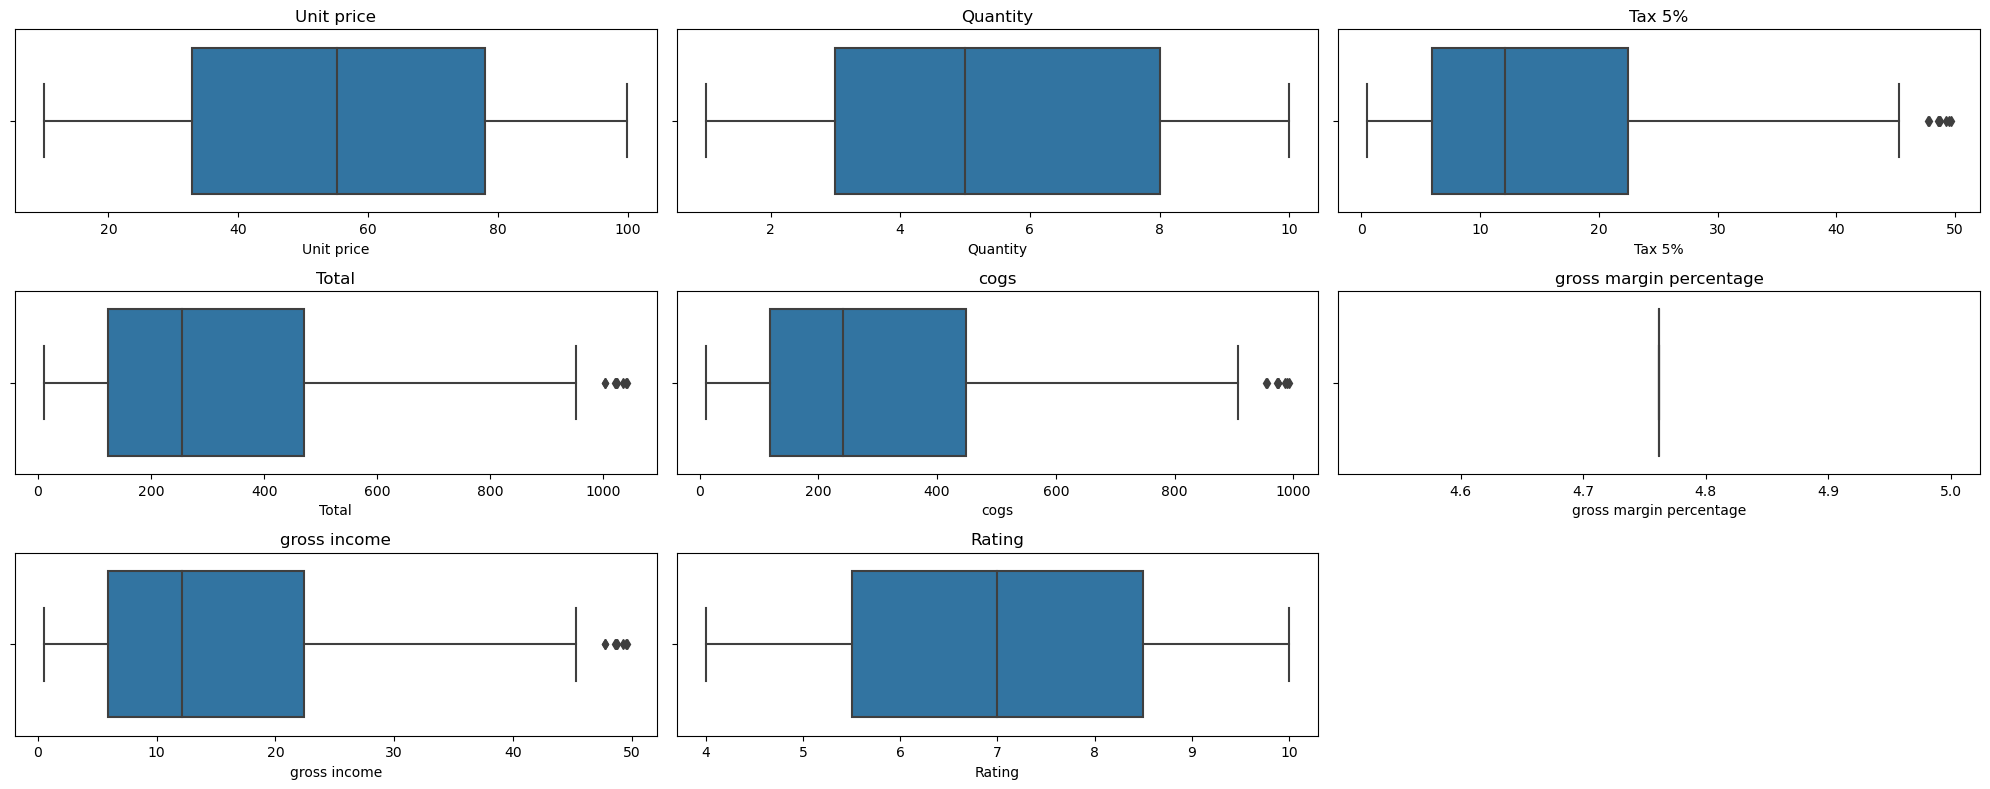

In [42]:
numeric_vars = df.select_dtypes(include='number').columns

num_vars = len(numeric_vars)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

plt.figure(figsize=(20, 8))
for i, var in enumerate(numeric_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(df[var])
    plt.title(var)
    
warnings.filterwarnings("ignore")

plt.tight_layout()
plt.show()

## Heatmap Correlation Matrix

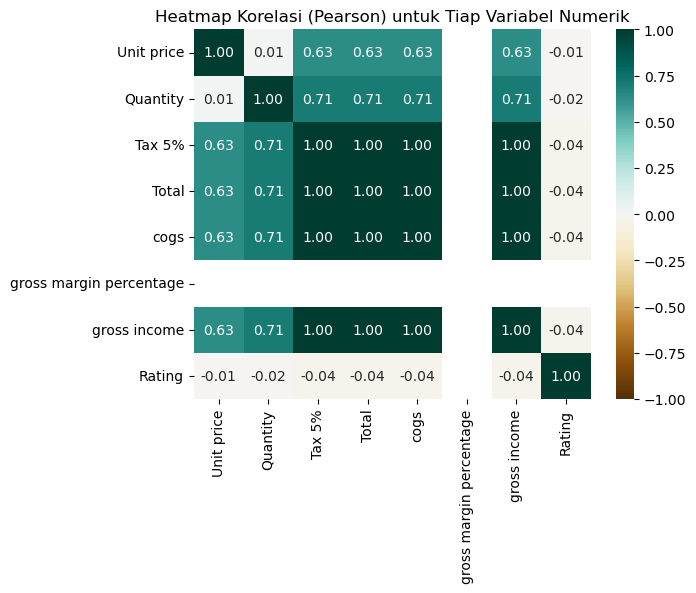

In [50]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2f')

plt.title('Heatmap Korelasi (Pearson) untuk Tiap Variabel Numerik', fontsize=12)
plt.show()

## Analysis Segmentasi Pelanggan

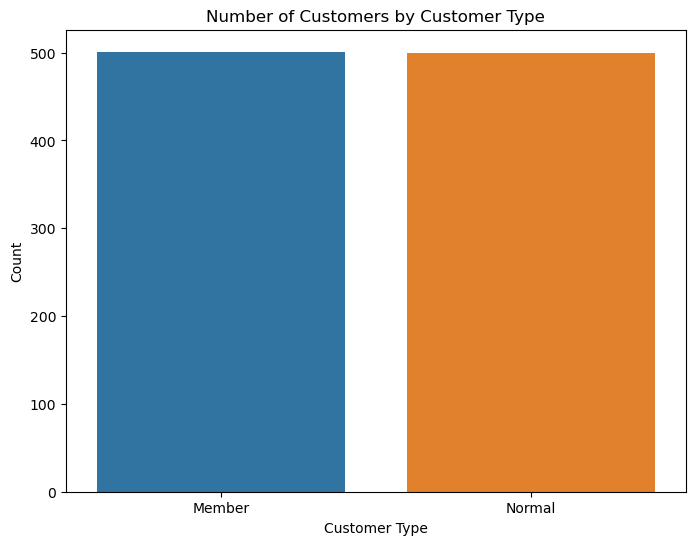

In [15]:
customer_type_counts = df['Customer type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Number of Customers by Customer Type')
plt.show()

In [16]:
print(customer_type_counts)

Member    501
Normal    499
Name: Customer type, dtype: int64


In [17]:
cust_type_dummies  = pd.get_dummies(df['Customer type'])
cust_type_dummies.head()

,Member,Normal
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [18]:
df_dummies = pd.concat([df_dummies, cust_type_dummies], axis = 1)
df_dummies.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Member,Normal
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,0,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,1


<AxesSubplot:xlabel='Product line', ylabel='Member'>

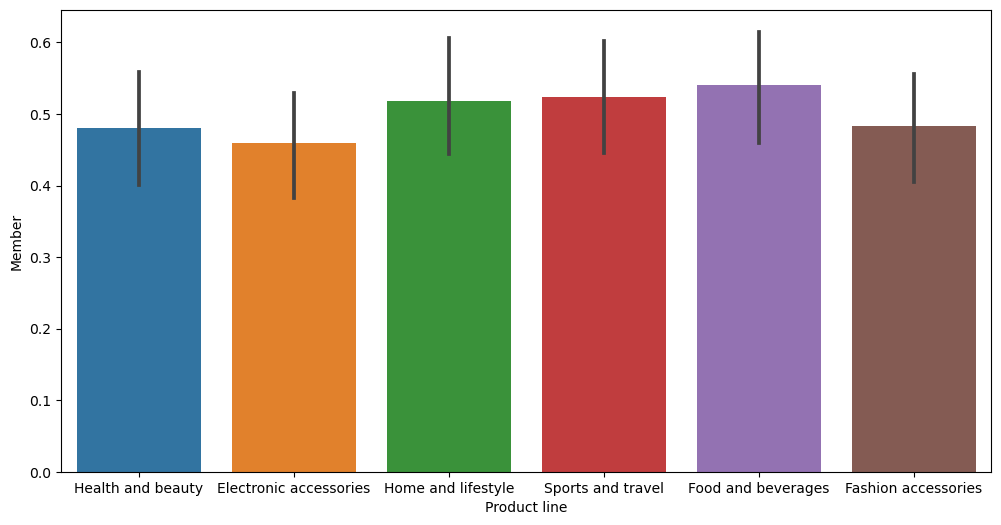

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Member', data = df_dummies)

<AxesSubplot:xlabel='Product line', ylabel='Normal'>

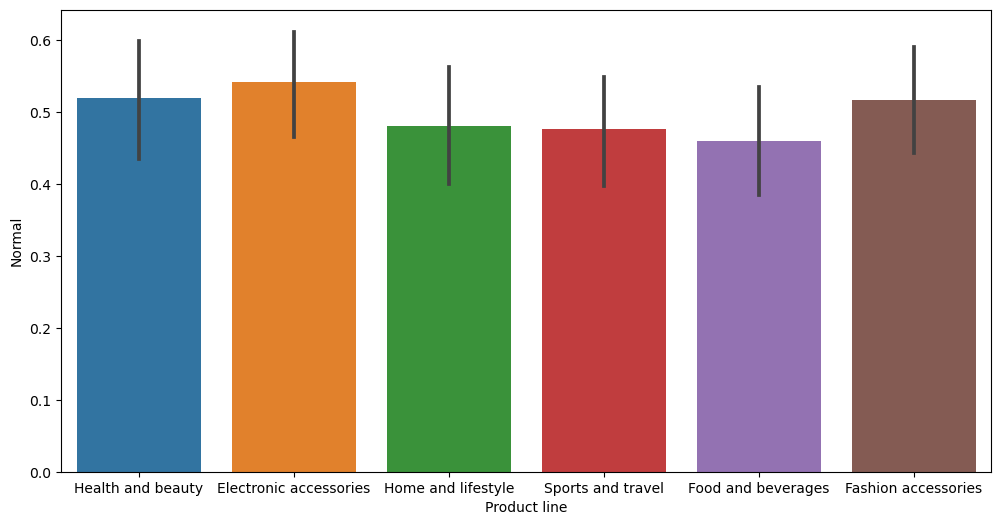

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Normal', data = df_dummies)

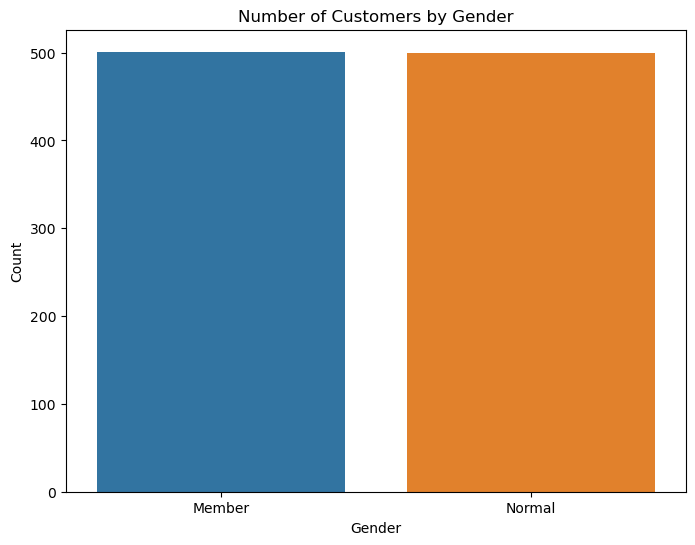

In [21]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Customers by Gender')
plt.show()

In [22]:
print(gender_counts)

Female    501
Male      499
Name: Gender, dtype: int64


In [23]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [24]:
df_dummies = pd.concat([df_dummies, gender_dummies], axis = 1)
df_dummies.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Member,Normal,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,0,1,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,1,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,0,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,1,0,1


<AxesSubplot:xlabel='Product line', ylabel='Female'>

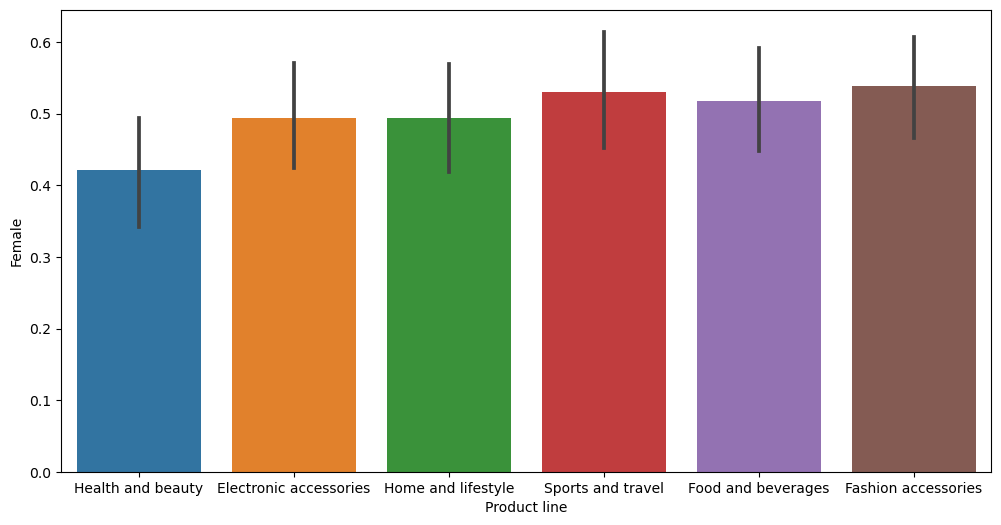

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df_dummies)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

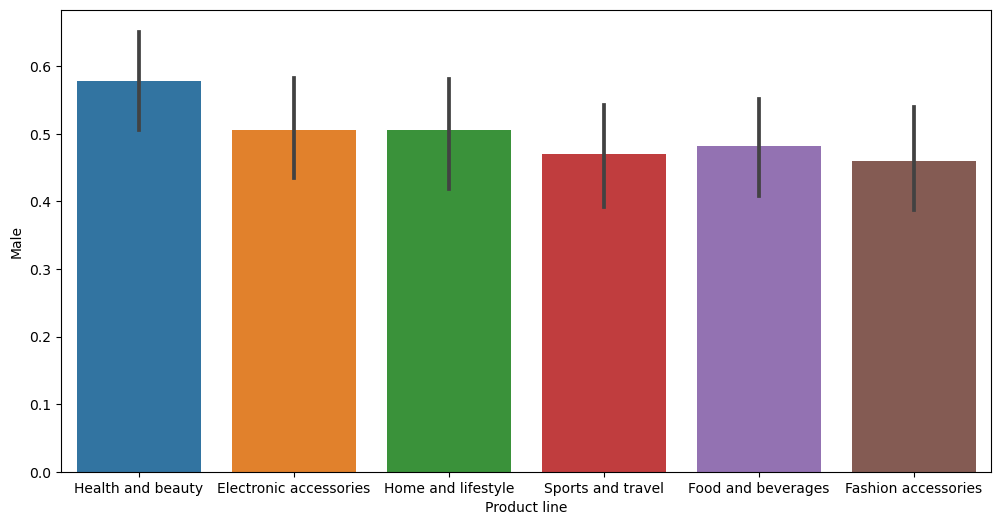

In [26]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Male', data = df_dummies)

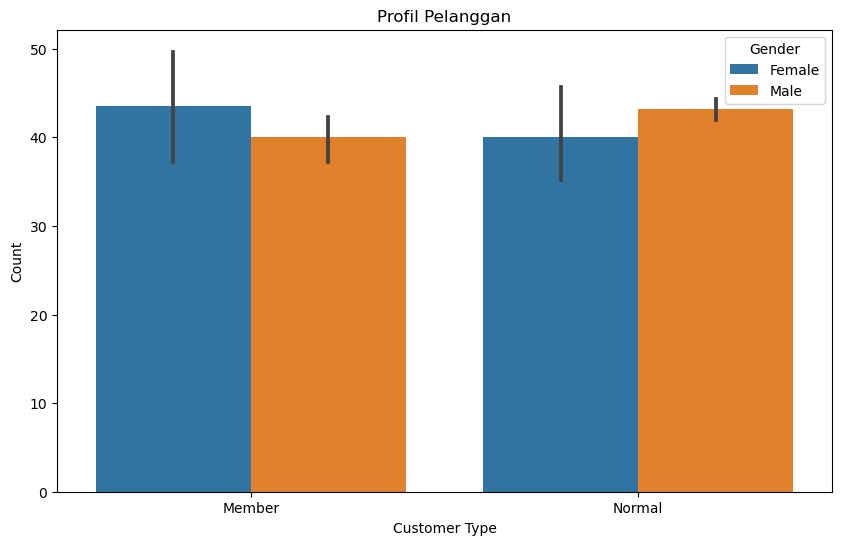

In [27]:
customer_profile = df.groupby(['Customer type', 'Gender', 'Product line']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_profile, x='Customer type', y='Count', hue='Gender')
plt.title('Profil Pelanggan')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

In [28]:
print(customer_profile)

   Customer type  Gender            Product line  Count
0         Member  Female  Electronic accessories     35
1         Member  Female     Fashion accessories     47
2         Member  Female      Food and beverages     51
3         Member  Female       Health and beauty     30
4         Member  Female      Home and lifestyle     47
5         Member  Female       Sports and travel     51
6         Member    Male  Electronic accessories     43
7         Member    Male     Fashion accessories     39
8         Member    Male      Food and beverages     43
9         Member    Male       Health and beauty     43
10        Member    Male      Home and lifestyle     36
11        Member    Male       Sports and travel     36
12        Normal  Female  Electronic accessories     49
13        Normal  Female     Fashion accessories     49
14        Normal  Female      Food and beverages     39
15        Normal  Female       Health and beauty     34
16        Normal  Female      Home and lifestyle

In [29]:
segmentation_counts = df.groupby(['Customer type', 'Gender']).size().reset_index(name='Count')
print(segmentation_counts)

  Customer type  Gender  Count
0        Member  Female    261
1        Member    Male    240
2        Normal  Female    240
3        Normal    Male    259


## Analysis total penjualan per cabang supermarket

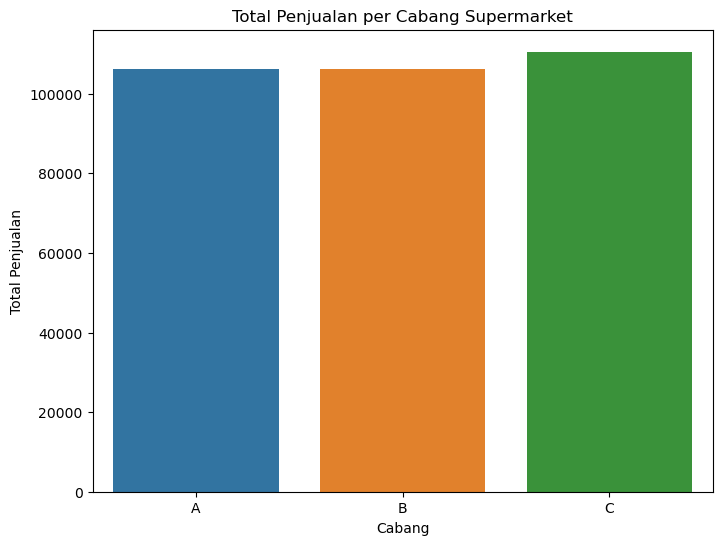

In [30]:
# Menghitung total penjualan per cabang
branch_sales = df.groupby('Branch')['Total'].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Total', data=branch_sales)
plt.title('Total Penjualan per Cabang Supermarket')
plt.xlabel('Cabang')
plt.ylabel('Total Penjualan')
plt.show()

In [31]:
print(branch_sales)

  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


In [32]:
highest_sales_branch = df.groupby('Branch')['Total'].sum().idxmax()
lowest_sales_branch = df.groupby('Branch')['Total'].sum().idxmin()
print('Cabang dengan Penjualan Tertinggi:', highest_sales_branch)
print('Cabang dengan Penjualan Terendah:', lowest_sales_branch)

Cabang dengan Penjualan Tertinggi: C
Cabang dengan Penjualan Terendah: B


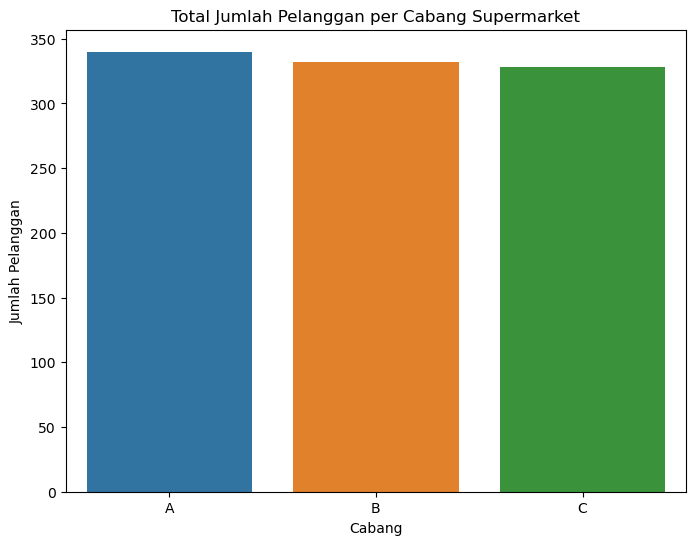

In [33]:
# Menghitung total jumlah pelanggan per cabang
branch_customers = df.groupby('Branch')['Customer type'].count().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Customer type', data=branch_customers)
plt.title('Total Jumlah Pelanggan per Cabang Supermarket')
plt.xlabel('Cabang')
plt.ylabel('Jumlah Pelanggan')
plt.show()

In [34]:
print(branch_customers)

  Branch  Customer type
0      A            340
1      B            332
2      C            328


## Analysis rating rata-rata pengalaman berbelanja

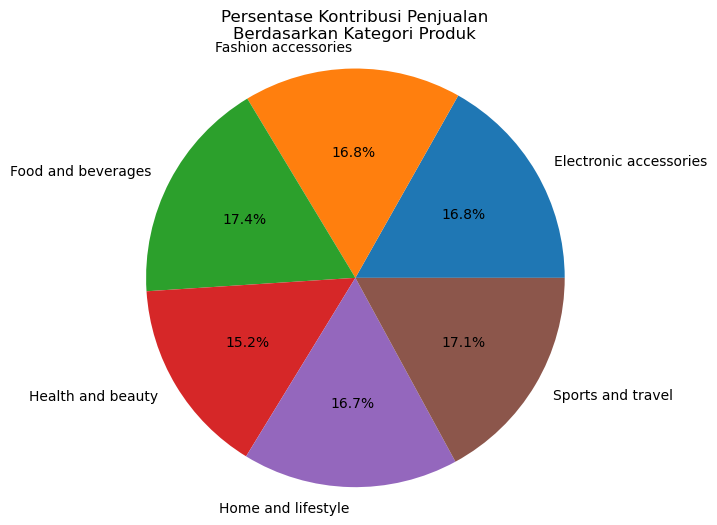

In [36]:
# Menghitung persentase kontribusi penjualan per kategori produk
category_sales = df.groupby('Product line')['Total'].sum()
sales_percentage = category_sales / category_sales.sum() * 100

# Membuat plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_percentage, labels=sales_percentage.index, autopct='%1.1f%%')
plt.title('Persentase Kontribusi Penjualan\nBerdasarkan Kategori Produk')
plt.axis('equal')
plt.show()

In [52]:
print(category_sales)

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


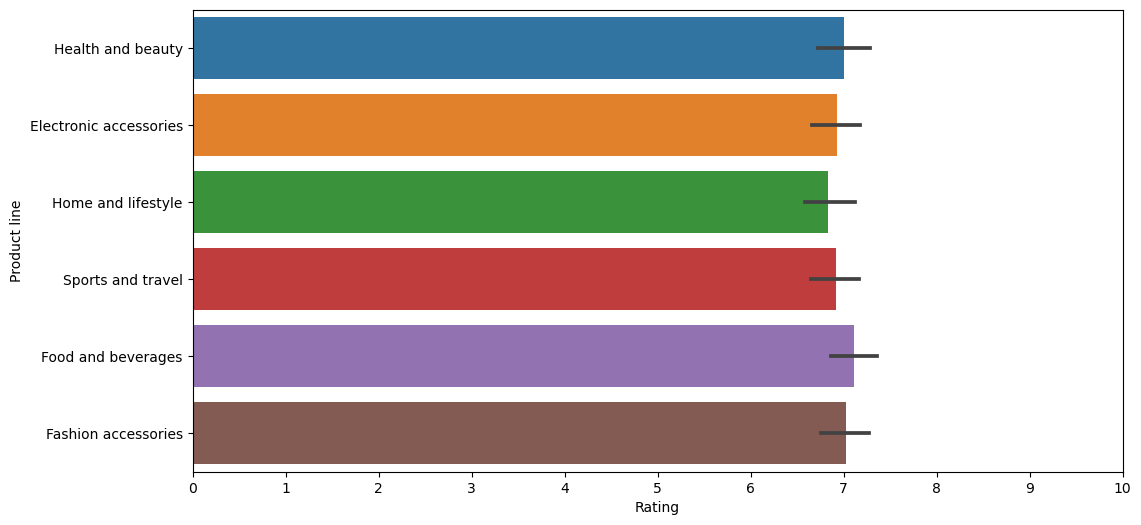

In [56]:
top_rated_product_line = df.groupby('Product line')['Rating'].mean().idxmax()
rate_data = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(rate_data)
plt.show()

In [57]:
print('Product Line dengan Rating Tertinggi:', top_rated_product_line)

Product Line dengan Rating Tertinggi: Food and beverages


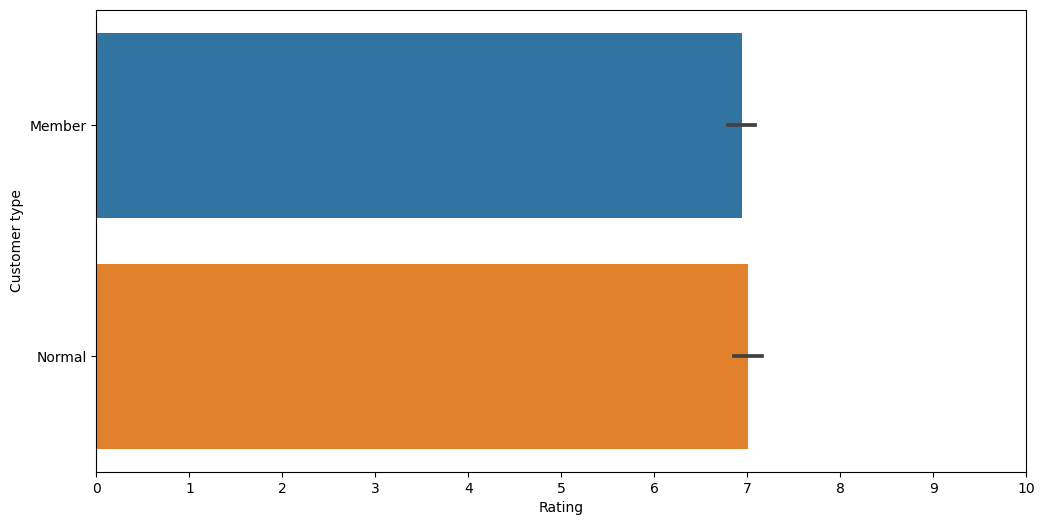

In [40]:
top_rated_customer_type = df.groupby('Customer type')['Rating'].mean().idxmax()
rate_data = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Customer type'], x = df['Rating'])
plt.xticks(rate_data)
plt.show()

In [41]:
print('Jenis Pelanggan dengan Rating Tertinggi:', top_rated_customer_type)

Jenis Pelanggan dengan Rating Tertinggi: Normal


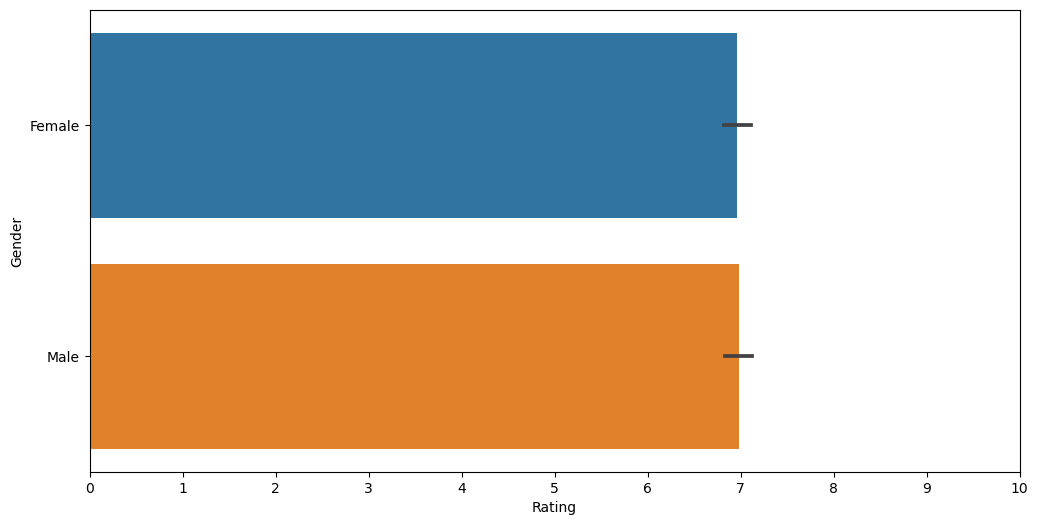

In [54]:
top_rated_gender = df.groupby('Gender')['Rating'].mean().idxmax()
rate_data = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Gender'], x = df['Rating'])
plt.xticks(rate_data)
plt.show()

In [59]:
print('Jenis Kelamin dengan Rating Tertinggi:', top_rated_gender)

Jenis Kelamin dengan Rating Tertinggi: Male


# Inference From Analysis

1. Dataset yang digunakan memiliki jumlah baris 1000 dan 17 kolom
2. Tidak terdapat nilai yang hilang (missing values) dalam dataset
3. Tidak ada duplikat dalam dataset
4. Variabel "gross margin percentage" memiliki distribusi yang hampir konstan dengan nilai rata-rata sekitar 4.76%. Hal ini menunjukkan bahwa marjin kotor supermarket cenderung tetap pada persentase yang relatif stabil.
5. Terdapat beberapa outlier pada kolom "Tax 5%", "Total", "cogs", dan "gross income".
6. Tidak ada korelasi yang signifikan antara variabel "Rating" dengan variabel numerik lainnya. Ini menunjukkan bahwa penilaian pelanggan terhadap pengalaman belanja mereka tidak secara langsung terkait dengan variabel-variabel numerik lainnya dalam dataset.
7. Jumlah pelanggan terbagi hampir secara merata antara pelanggan dengan kartu anggota dan pelanggan biasa.
    - Member: 501
    - Normal: 499
8. Terdapat perbedaan jumlah pelanggan berdasarkan jenis kelamin dalam setiap kategori produk. Pada umumnya, jumlah pelanggan wanita lebih banyak daripada pelanggan pria.
9. Kategori produk "Electronic accessories" dan "Sports and travel" menarik lebih banyak perhatian pelanggan pria, sedangkan kategori produk "Health and beauty" dan "Home and lifestyle" cenderung menarik lebih banyak perhatian pelanggan wanita.
10. Jumlah pelanggan terbagi hampir secara merata antara pelanggan dengan jenis kelamin pria dan wanita
    - Female: 501
    - Male: 499
11. Branch dengan total penjualan tertinggi adalah Branch C, diikuti oleh Branch A dan Branch B.
12. Branch dengan jumlah pelanggan tertinggi adalah Branch A, diikuti oleh Branch B dan Branch C.
13. Dari skala rating yang digunakan yaitu 0 hingga 10, kategori produk "Food and beverages" memiliki rating tertinggi
14. Dari skala rating yang digunakan yaitu 0 hingga 10, Jenis pelanggan "Normal" memiliki rating tertinggi
15. Dari skala rating yang digunakan yaitu 0 hingga 10,Jenis kelamin "Male" memiliki rating tertinggi